In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import pickle
import time
from pytorch_lstm import PytorchLSTMModel

In [2]:
with open("gedichte_large.txt", "r") as f:
    train_text = f.read()
    
with open("gedichte_validation_large.txt", "r") as f:
    val_text = f.read()

In [3]:
chars = list(sorted(set(train_text)))

In [4]:
val_text = "".join(list(filter(lambda c: c in chars, val_text)))

In [5]:
c_to_i = {c : i for i, c in enumerate(chars)}
i_to_c = {i: c for i, c in enumerate(chars)}

In [6]:
def encode(s):
    res = list(map(lambda c: c_to_i[c], s))
    return torch.tensor(res)

In [7]:
def decode(t):
    
    if isinstance(t, torch.Tensor):
        t = t.tolist()
        
    return "".join(list(map(lambda i: i_to_c[i], t)))

In [8]:
train_data = encode(train_text)
val_data = encode(val_text)

In [9]:
block_size = 128

In [10]:
def get_X_y(data, block_size):

    X = []
    y = []

    for start_idx in range(block_size, len(data)-1):
        X.append(data[start_idx-block_size:start_idx])
        y.append(data[start_idx-block_size + 1: start_idx + 1])

    X = torch.stack(X)  # Convert X to a PyTorch tensor
    y = torch.stack(y)
    
    return X, y

In [11]:
X_train, y_train = get_X_y(train_data, block_size)
X_val, y_val = get_X_y(val_data, block_size)

In [12]:
# data set sizes
print(f"training set size = {len(X_train)}, validation set size = {len(X_val)}")

training set size = 4195004, validation set size = 54463


In [13]:
print(f"vocab_size = {len(chars)}")

vocab_size = 154


In [14]:
enable_cuda = True

In [15]:
lstm_model = PytorchLSTMModel(n_chars = len(chars), n_embed = 32, block_size = block_size, enable_cuda = enable_cuda)

device = cuda


In [55]:
N = len(X_train)

start_time = time.time()

lstm_model.train(X_train[:N], y_train[:N], X_val[:N], y_val[:N], n_epochs = 1, lr=3e-4, batch_size = 1024)

end_time= time.time()

print(f"Training took {end_time - start_time:.3} seconds, (cuda = {enable_cuda})")

100%|███████████████████████████████████████| 4097/4097 [30:52<00:00,  2.21it/s]


1. train loss = 1.332854662547904, val loss = 1.6885935884934884
Training took 1.86e+03 seconds, (cuda = True)


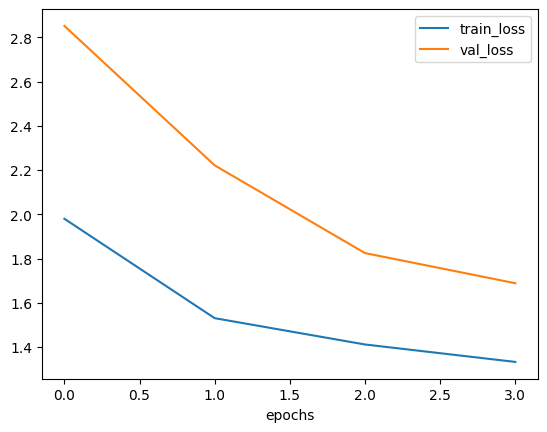

In [56]:
plt.plot(lstm_model.train_loss_per_epoch, label="train_loss")
plt.plot(lstm_model.val_loss_per_epoch, label="val_loss")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [58]:
prompt_str = "Frühling ist so schön\nSommer ist noch besser"

In [59]:
prompt = encode(prompt_str)

print(f"prompt length = {len(prompt)}")

prompt length = 44


In [60]:
print(prompt_str)

Frühling ist so schön
Sommer ist noch besser


In [61]:
gen = lstm_model.generate(context=prompt, n = 1000, temperature=0.8)

In [62]:
print(decode(gen))

 bewegt –


Als ich zu den Himmel schreiten.





Auf einen Sternen. Im Jarol 1938



Unter Schaaren hinternd ergriffen

Die Dunkel als Spielzeug der Freiheit
Dich herauf, die Erde kranke,


Und Standpalanen dann der Jugend ab –

Um euch in der Demus und ihn, sich nicht sieht sie vom
eine Kolomene selig schön.

Die Welt durchlagt an unsere Brüste


Armes zu stropfen Wilhelmraum – –

Schöne Meladeewunden.
Die Taumeln drang vor ihren Tagen


Und Blumen, die sich nur gestaltet,

Und wird die herrlichsten der Gestalt,
Wir
gebendet
der
Arbeit Ihr erkennen.








Frau Wilderbau.

Das Sonnenlicht und wie von Hintertument
Aus der Geste knallene.







Der Geisterstande

Herrscht das Frauendunkel auch in Winde –


Meckerte in den Tannen

Sind die Welt im stillen Nacht.
Und als das Schieber sey nicht immer geruht,


Denn nimmer wo das Parademie

Geht alles andre Leute voll.




Es war ein Spielmann aus dem reinen
Traumgesichter vorüber in die Baillen.









Die Nacht.

(1889.)

Nimm das Ei

In [57]:
lstm_model.save_model("german_poems_large_4.pth")

Model successfully saved to german_poems_large_4.pth
